# Segmentacion GRABCUT

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import os
import pandas as pd

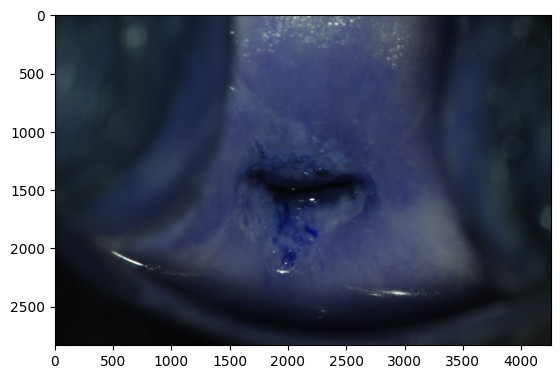

In [ ]:
img = cv2.imread('I110935.jpg')
plt.imshow(img)
plt.show()
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)


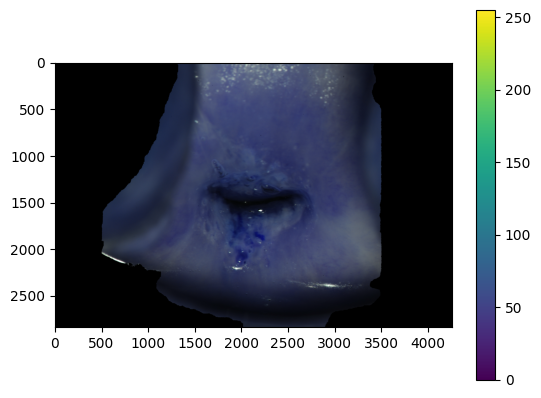

(<matplotlib.image.AxesImage at 0x7877d4c08310>,
 None)

In [ ]:
rect = (500,0,3000,3000)
#rect = (233,50,554,536)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_mask = img*mask2[:,:,np.newaxis]

plt.imshow(img_mask),plt.colorbar(),plt.show()

In [ ]:
def segment_image_with_grabcut(image_path):
    # Cargar la imagen
    img = cv2.imread(image_path)

    # Redimensionar la imagen
    resized_img = cv2.resize(img, (500,500))

    # Crear una máscara inicial
    mask = np.zeros(resized_img.shape[:2], np.uint8)

    # Inicializar modelos de fondo y primer plano
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    # Definir el rectángulo de inicialización en la imagen redimensionada
    rect = (50, 0, 400, 450)

    # Aplicar el algoritmo GrabCut a la imagen redimensionada
    cv2.grabCut(resized_img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
    # Crear una máscara binaria a partir de la máscara resultante
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    segmented = mask2.astype(bool)
    # Aplicar la máscara a la imagen redimensionada
    #img_mask = resized_img * mask2[:, :, np.newaxis]

    return segmented

In [ ]:
def guardar(imagenbn, nombreArchivo):
  # Convertir la máscara a objeto de imagen
  mask_image = Image.fromarray(imagenbn)

  # Guardar la máscara
  ruta = '/content/drive/MyDrive/PROYECTO_GRADO/Grabcut/' + nombreArchivo
  mask_image.save(ruta)


In [ ]:
ruta = "/content/drive/MyDrive/Training_SM/Training_Unet/Imagenes"
lista_archivos_Original = os.listdir(ruta)
lista_archivos_Original[1]

'308.jpg'

In [ ]:
for i in range (len(lista_archivos)):
  Archivo = lista_archivos[i]
  #Ruta de imagen
  rutaImg = '/content/drive/MyDrive/Training_SM/Training_Unet/Imagenes/' + Archivo
  new_size = (500,500)
  Mascara_MG = segment_image_with_grabcut(rutaImg)
  guardar(Mascara_MG, Archivo)

In [ ]:
ruta = "/content/drive/MyDrive/PROYECTO_GRADO/Grabcut/"
lista_archivos = os.listdir(ruta)
len(lista_archivos)

1050